In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics

In [2]:
#compare number i,j with H_{I} I=0,1
def compare_500examples(i, j, path, homology, indice):
    path_h = path+"multiland_output_h%d/"%homology
    X = []
    multiland_files = os.listdir(path_h)
    multiland_files.sort(key=lambda x: int(x[9:].split('_')[0]))
    l1 = [500*i, 500*j] 
    Y = np.zeros(1000)
    Y[500:1001] = 1
    for w in l1:
        for x in multiland_files[w:w+500]:
            X.append(np.load(path_h+x)[indice].flatten())
    nbr_of_repeats = 100
    X = np.array(X)
    test_accuracy_lda = []
    test_accuracy_lda_pca = []
    test_svc_pca=[]

    for _ in tqdm(range(nbr_of_repeats)):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
        """
        LDA 
        """
        lr = LDA()
        lr.fit(x_train, y_train)
        test_accuracy_lda.append(lr.score(x_test,y_test))
        #print(lr.score(x_test, y_test))
        """
        PCA+LDA 
        """
        #pca = PCA(n_components=3)
        pca = PCA(n_components='mle')
        pca.fit(x_train)
        #print("pca.components_", pca.components_.shape)
        x_train_reduction = pca.transform(x_train)
        #print("chang_x_train", x_train_reduction.shape)
        x_test_reduction = pca.transform(x_test)
        #print("chang_x_test", x_train_reduction.shape)
        lr = LDA()
        lr.fit(x_train_reduction,y_train)
        test_accuracy_lda_pca.append(lr.score(x_test_reduction,y_test))
        """
        PCA+SVM
        """
        clf_svc = svm.SVC()
        clf_svc.fit(x_train_reduction, y_train)
        test_svc_pca.append(clf_svc.score(x_test_reduction,y_test))
        #print("svc:",clf_svc.score(x_test_reduction,y_test))
    print("lda accuracy:", np.mean(test_accuracy_lda))
    print("lda with pca accuracy:", np.mean(test_accuracy_lda_pca))
    print("svc with pca accuracy:", np.mean(test_svc_pca))

In [3]:
path_mixG = "/home/hjx/Mix_GENEO/mixG_500examples/multiland_output/"

In [4]:
compare_500examples(0,1,path_mixG,1,1)

100%|██████████| 100/100 [09:04<00:00,  5.44s/it]

lda accuracy: 0.9853999999999999
lda with pca accuracy: 0.981
svc with pca accuracy: 0.9867999999999999


In [5]:
compare_500examples(1,3,path_mixG,1,1)

100%|██████████| 100/100 [07:26<00:00,  4.46s/it]

lda accuracy: 0.9570500000000002
lda with pca accuracy: 0.9570999999999998
svc with pca accuracy: 0.96815


In [6]:
compare_500examples(6,9,path_mixG,1,1)

100%|██████████| 100/100 [07:47<00:00,  4.67s/it]

lda accuracy: 0.7326
lda with pca accuracy: 0.8037500000000002
svc with pca accuracy: 0.8211000000000002


In [7]:
compare_500examples(0,1,path_mixG,0,1)

100%|██████████| 100/100 [36:26<00:00, 21.86s/it]

lda accuracy: 0.9747499999999998
lda with pca accuracy: 0.9682999999999998
svc with pca accuracy: 0.99055


In [8]:
compare_500examples(1,3,path_mixG,0,1)

100%|██████████| 100/100 [30:47<00:00, 18.48s/it]

lda accuracy: 0.9328500000000001
lda with pca accuracy: 0.9259500000000003
svc with pca accuracy: 0.9433


In [9]:
compare_500examples(6,9,path_mixG,0,1)

100%|██████████| 100/100 [36:31<00:00, 21.91s/it]

lda accuracy: 0.7658
lda with pca accuracy: 0.7968499999999998
svc with pca accuracy: 0.7570500000000001


In [10]:
def compare_both_h0_h1(i, j, path, indice):
    path_h0 = path+"multiland_output_h0/"
    path_h1 = path + "multiland_output_h1/"
    X = []
    multiland_files_h0 = os.listdir(path_h0)
    multiland_files_h1 = os.listdir(path_h1)
    multiland_files_h0.sort(key=lambda x: int(x[9:].split('_')[0]))
    multiland_files_h1.sort(key=lambda x: int(x[9:].split('_')[0]))
    l1 = [i*500, j*500]
    Y = np.zeros(1000)
    Y[500:1001] = 1
    for w in l1:
        #for x,y in zip(multiland_files_h0[w:w+500],multiland_files_h1[w:w+500]):
        for x,y in zip(multiland_files_h0[w:w +500],multiland_files_h1[w:w + 500]):
            #X.append(np.load(path_h0+x)[indice].flatten())
            multi_h0 = np.load(path_h0+x)[indice]
            #print("multi_h0.shape", multi_h0.shape)
            multi_h1 = np.load(path_h1+y)[indice]
            #print("multi_h1.shape", multi_h1.shape)
            multi_h = np.append(multi_h0,multi_h1,axis=0)
            #print("multi_h0.shape", multi_h.shape)
            X.append(multi_h.flatten())
    nbr_of_repeats = 100
    test_accuracy_lda_pca=[]
    test_svc_pca=[]
    #X = np.array(X)
    test_accuracy_lda = []
    for _ in tqdm(range(nbr_of_repeats)):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
        """
        LDA 
        """
        lr = LDA()
        #x_train_lda = LDA.fit_transform(x_train, y_train)
        #x_test_lda = LDA.fit_transform(x_test, y_test)
        lr.fit(x_train, y_train)
        test_accuracy_lda.append(lr.score(x_test,y_test))
        #print("LDAaccuracy:", lr.score(x_test, y_test))
        """
        LDA+PCA
        """
        pca = PCA(n_components=0.98)
        pca.fit(x_train)
        #print("pca.components_", pca.components_.shape)
        x_train_reduction = pca.transform(x_train)
        #print("chang_x_train", x_train_reduction.shape)
        x_test_reduction = pca.transform(x_test)
        #print("chang_x_test", x_train_reduction.shape)
        lr = LDA()
        lr.fit(x_train_reduction, y_train)
        test_accuracy_lda_pca.append(lr.score(x_test_reduction, y_test))

        """
        PCA+SVM
        """
        clf_svc = svm.SVC()
        clf_svc.fit(x_train_reduction, y_train)
        test_svc_pca.append(clf_svc.score(x_test_reduction, y_test))
        #print("svc:", clf_svc.score(x_test_reduction, y_test))

    print("lda pca accuracy:", np.mean(test_accuracy_lda_pca))
    print("svc pca accuracy:", np.mean(test_svc_pca))
    print("lda accuracy:", np.mean(test_accuracy_lda))

In [11]:
compare_both_h0_h1(0,1,path_mixG,1)

100%|██████████| 100/100 [01:15<00:00,  1.32it/s]

lda pca accuracy: 0.99095
svc pca accuracy: 0.9929499999999999
lda accuracy: 0.9824499999999997


In [12]:
compare_both_h0_h1(1,3,path_mixG,1)

100%|██████████| 100/100 [01:10<00:00,  1.42it/s]

lda pca accuracy: 0.9693999999999999
svc pca accuracy: 0.9764999999999998
lda accuracy: 0.9568999999999999


In [13]:
compare_both_h0_h1(6,9,path_mixG,1)

100%|██████████| 100/100 [01:09<00:00,  1.43it/s]

lda pca accuracy: 0.8730500000000001
svc pca accuracy: 0.8870500000000001
lda accuracy: 0.8581999999999997


In [50]:
#import os
for i in range(10):
    locals()['land_mixG_h0_'+str(i)] = []
    locals()['land_mixG_h1_'+str(i)] = []


multifiles_mixG_h0=path_mixG + "multiland_output_h0/"
multifiles_mixG_h1=path_mixG + "multiland_output_h1/"

l = [0, 5923, 12665, 18623, 24754, 30596, 36017, 41935, 48200, 54051]
for w in range(10):
    for index in range(500):
        locals()['land_mixG_h1_'+str(w)].append(np.load(multifiles_mixG_h1+'x_ctrain_{}_H1.npy'.format(l[w]+index))[1])
        locals()['land_mixG_h0_'+str(w)].append(np.load(multifiles_mixG_h0+'x_ctrain_{}_H0.npy'.format(l[w]+index))[1])
    locals()['land_mixG_h0_'+str(w)] = np.array(locals()['land_mixG_h0_'+str(w)])
    locals()['land_mixG_h1_'+str(w)] = np.array(locals()['land_mixG_h1_'+str(w)])
    locals()['land_mixG_h0_'+str(w)] = np.mean(locals()['land_mixG_h0_'+str(w)],axis=0)
    locals()['land_mixG_h1_'+str(w)] = np.mean(locals()['land_mixG_h1_'+str(w)],axis=0)
    

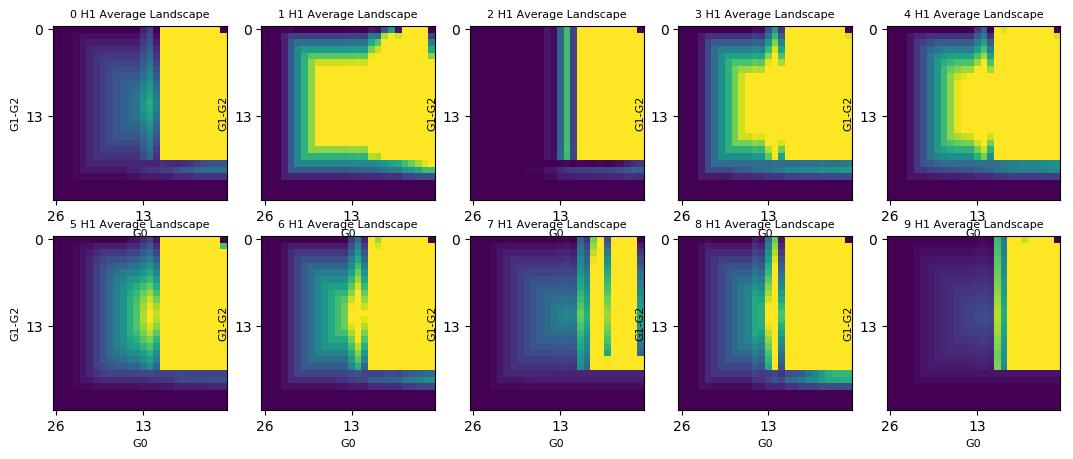

In [56]:
#plot Multi-GENEO H1
f, axes = plt.subplots(2,5,figsize=(13,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("G0",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{i} H1 Average Landscape", fontsize=8)
    ax.imshow(locals()['land_mixG_h1_'+str(i)], cmap="viridis", vmax=1, vmin=0)

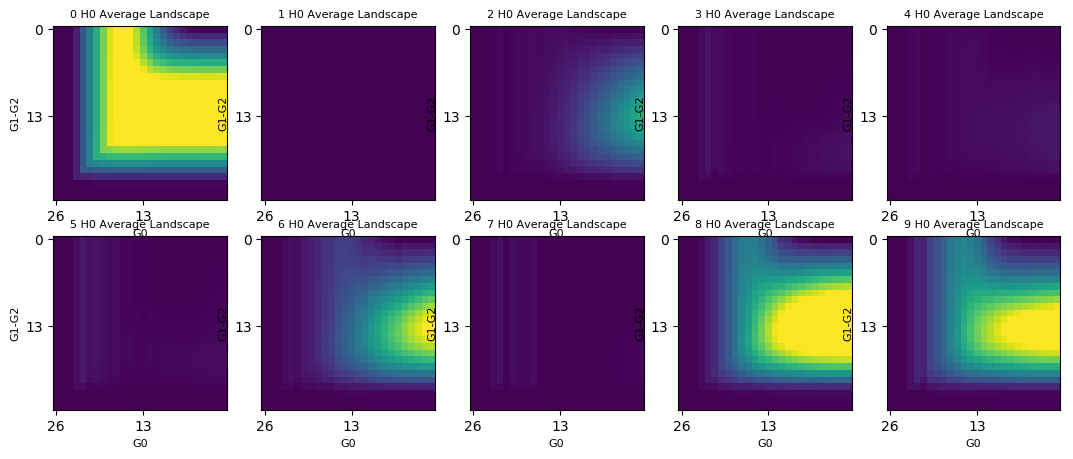

In [57]:
#plot Multi-GENEO H0
f, axes = plt.subplots(2,5,figsize=(13,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("G0",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{i} H0 Average Landscape", fontsize=8)
    ax.imshow(locals()['land_mulG_h0_'+str(i)], cmap="viridis", vmax=50, vmin=0)

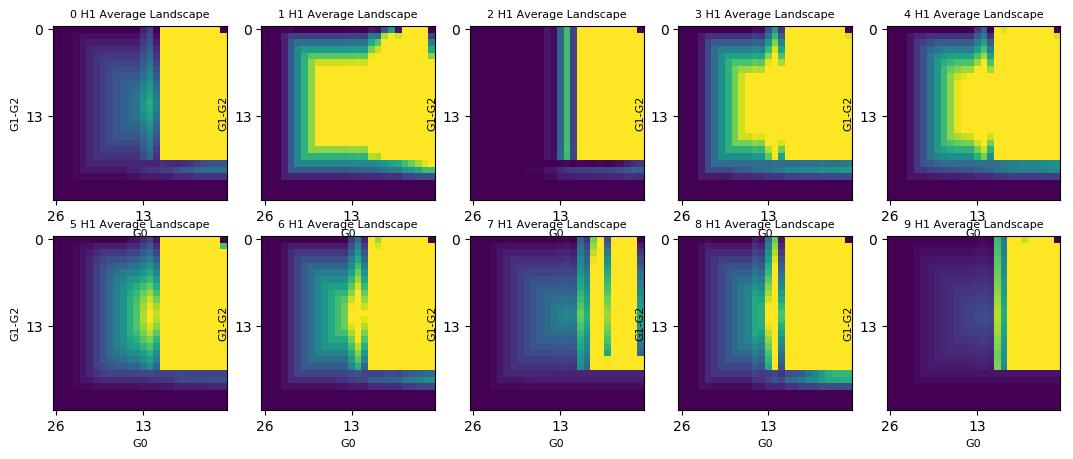

In [53]:
#plot Mix-GENEO H1
f, axes = plt.subplots(2,5,figsize=(13,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("G0",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{i} H1 Average Landscape", fontsize=8)
    ax.imshow(locals()['land_mixG_h1_'+str(i)], cmap="viridis", vmax=1, vmin=0)

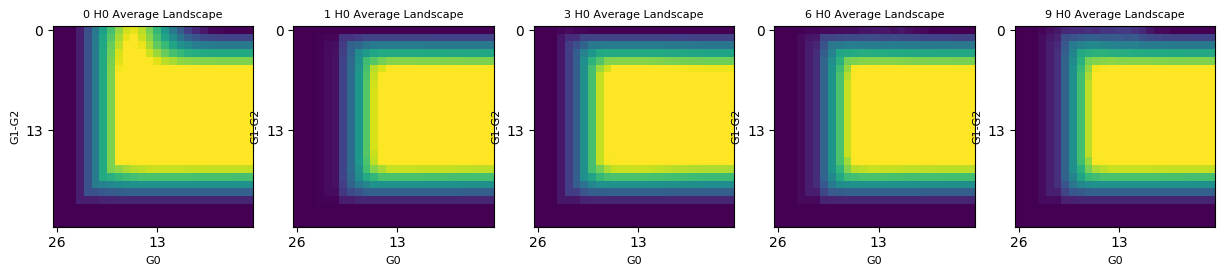

In [54]:
f, axes = plt.subplots(1,5,figsize=(15,5))
L = [0,1,3,6,9]
J=  [1,2,3,4,5]
for l,j in zip(L,J):
    ax = plt.subplot(1,5,j)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("G0",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{l} H0 Average Landscape", fontsize=8)
    ax.imshow(locals()['land_mixG_h0_'+str(l)], cmap="viridis", vmax=50, vmin=0)

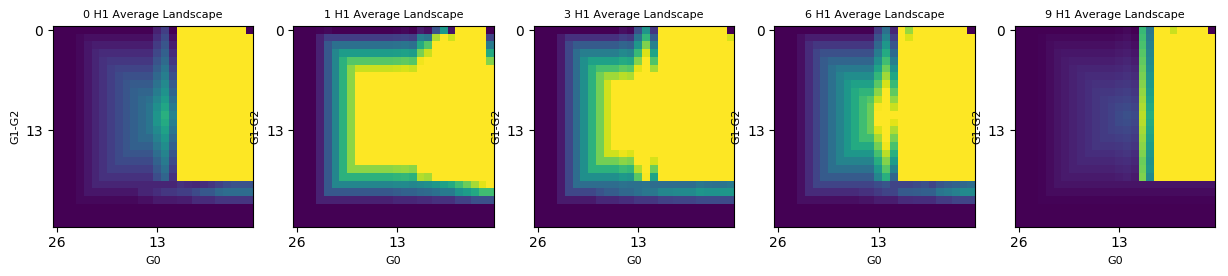

In [55]:
f, axes = plt.subplots(1,5,figsize=(15,5))
L = [0,1,3,6,9]
J=  [1,2,3,4,5]
for l,j in zip(L,J):
    ax = plt.subplot(1,5,j)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("G0",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{l} H1 Average Landscape", fontsize=8)
    ax.imshow(locals()['land_mixG_h1_'+str(l)], cmap="viridis", vmax=1, vmin=0)